In [1]:
import sys
import os
import numpy as np
from tqdm import tqdm
import datetime

In [2]:
# vor_path = "/home/ubuntu/git/active_vertex"
vor_path = 'C:\\Users\\Pranav\\git\\active_vertex'
sys.path.append(vor_path)

import voronoi_model.voronoi_model_periodic as avm
# import voronoi_model.voronoi_model_periodic_dev as avm_dev
# import voronoi_model.voronoi_model_periodic_jcs as avm_jcs

In [3]:
def print_SPV_params(vor2, p, J):
    print(
        """
    Number of cells : {0}
    Time-span       : {1:.2f} - {2:.2f}
    Time-step (dt)  : {3:.3f}

    === Parameters ===
    Dr      : {4:.1e}
    kappa_A : {5:.2f}
    kappa_P : {6:.2f}
    a       : {7:.2f}
    k       : {8:.1f}
    p0      : {9:.2f}
    v0      : {10:.2e}
    J (adh) : {11:.3f}
    """.format(
            vor2.n_c,
            vor2.t_span[0],
            vor2.t_span[-1],
            vor2.dt,
            vor2.Dr,
            vor2.kappa_A,
            vor2.kappa_P,
            vor2.a,
            vor2.k,
            p,
            vor2.v0,
            J
        )
    )

In [17]:
f = 200
t0 = 0
tmax = 1
dt = 0.02
n_t = int((tmax - t0) * f / dt) + 1  # calculates the n_t to get the desired dt

a = 0.35
k = 2

In [18]:
p = 3.8
J = 0
v = 1e-1

In [22]:
# vor2 = avm.Tissue()
vor2 = avm_jcs.Tissue()
vor2.generate_cells(600)
vor2.make_init(10)

vor2.set_t_span(0.02, 100 + 200)  # 100 warmup
# vor2.set_GRN_t_span(t0, tmax, n_t, scaling_factor=f);

vor2.v0 = v
# vor2.n_warmup_steps = int(100 / dt)

W = J * np.array([[1, 0], [0, 1]])
vor2.set_interaction(W=W, pE=0)
vor2.A0 = 0.86
vor2.P0 = p * np.sqrt(vor2.A0)

vor2.Dr = 0.01
vor2.kappa_A = 0.2
vor2.kappa_P = 0.1
vor2.a = a
vor2.k = k

In [23]:
print_SPV_params(vor2, p, J)


    Number of cells : 120
    Time-span       : 0.00 - 299.98
    Time-step (dt)  : 0.020

    === Parameters ===
    Dr      : 1.0e-02
    kappa_A : 0.20
    kappa_P : 0.10
    a       : 0.35
    k       : 2.0
    p0      : 3.80
    v0      : 1.00e-01
    J (adh) : 0.000
    


In [24]:
vor2.simulate(
#     progress_bar=True,
#     print_updates=True,
    print_every=1e9,
);

0.0 %
6.666666666666667 %
13.333333333333334 %
20.0 %
26.666666666666668 %
33.33333333333333 %
40.0 %
46.666666666666664 %
53.333333333333336 %
60.0 %
66.66666666666666 %
73.33333333333333 %
80.0 %
86.66666666666667 %
93.33333333333333 %
Simulation complete


In [31]:
# vor2 = avm.Tissue()
vor = avm.Tissue()
vor.generate_cells(600)
vor.make_init(10)

# vor2.set_t_span(0.02, 100 + 200)  # 100 warmup
vor.set_GRN_t_span(t0, tmax, n_t, scaling_factor=f);

vor.v0 = v
vor.n_warmup_steps = int(100 / dt)

W = J * np.array([[1, 0], [0, 1]])
vor.set_interaction(W=W, pE=0)
vor.A0 = 0.86
vor.P0 = p * np.sqrt(vor2.A0)

vor.Dr = 0.01
vor.kappa_A = 0.2
vor.kappa_P = 0.1
vor.a = a
vor.k = k

In [32]:
vor.simulate(
    progress_bar=True,
    print_updates=True,
#     print_every=1000,
);

Warming up SPV (5000 steps)


100%|██████████| 10000/10000 [01:20<00:00, 124.92it/s]


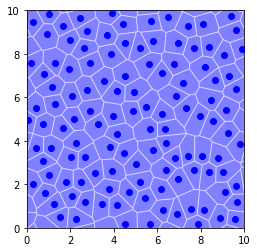

In [34]:
vor2.animate(
    150,
    "f200_tmax1_v1e-1_JCS", 
#     n_frames=100, 
#     print_updates=False
)

In [35]:
vor.animate(
#     150,
    "f200_tmax1_v1e-1_PSB", 
    n_frames=100, 
    print_updates=True
)

Saving to plots/f200_tmax1_v1e-1_PSB.mp4


<hr>

This code is for debugging the SVP when equiangulate fails.

In [25]:
# args = [
#     vor2.tris,
#     vor2.CV_matrix,
#     vor2.n_v,
#     vor2.n_c,
#     vor2.L,
#     vor2.A,
#     vor2.P,
#     vor2.Cents,
#     vor2.kappa_A,
#     vor2.kappa_P,
#     vor2.A0,
#     vor2.P0,
# ]

# has_nan = []
# for i, a in enumerate(args):
#     if np.any(np.isnan(a)):
#         has_nan.append(i)

In [26]:
# has_nan

OK!! So when equiangulate times out, self.get_F_periodic(...) calls get_F_periodic(\*args), which returns nans - even when none of the args contain nans!!

<hr>

In [42]:
p_space = np.linspace(3.5, 3.9, 5)
v_space = np.arange(2e-3, 3e-2, 4e-3)
replicates = np.arange(1)

param_space = np.meshgrid(
    p_space,
    v_space,
    replicates
)
param_space = np.array(param_space).T.reshape(-1, 3)

<hr>